# Cheese Classifier

This notebook creates and exports a convolutional neural network model trained to classify cheese. It is based on Lesson 2 from the fast.ai Deep Learning Course, Part 1 from 2019 (https://github.com/fastai/course-v3/).

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.widgets import *

This notebook was made with the following version of fastai:

In [3]:
__version__

'1.0.50.post1'

## 1. Creating the Dataset

A few hundreds of pictures are manually selected on Google Image using the [gi2ds](https://github.com/toffebjorkskog/ml-tools) tool. They are saved as list of URLs into the `data` folder:

In [4]:
path = Path("data")
url_files = [child for child in path.iterdir() if child.name.startswith("urls_")]
url_files

[PosixPath('data/urls_saint-nectaire.txt'),
 PosixPath('data/urls_reblochon.txt'),
 PosixPath('data/urls_roquefort.txt'),
 PosixPath('data/urls_comté.txt'),
 PosixPath('data/urls_cantal.txt'),
 PosixPath('data/urls_camembert.txt')]

For each list of URLs, a new folder is created and all images are downloaded inside it. 

Invalid images are deleted and images that are too big are resized to 500px.

In [5]:
for file in url_files:
    name = file.stem[5:]
    print(name)
    dest = path/name
    dest.mkdir(parents=True, exist_ok=True)
    download_images(file, dest, max_pics=200)
    verify_images(dest, delete=True, max_size=500)

saint-nectaire


Error https://www.cocoonage.fr/86-large_default/saint-nectaire-fermier-aop.jpg HTTPSConnectionPool(host='www.cocoonage.fr', port=443): Max retries exceeded with url: /86-large_default/saint-nectaire-fermier-aop.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f0fb9191160>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error https://www.monoprix.fr/assets/images/grocery/1559545/580x580.jpg HTTPSConnectionPool(host='www.monoprix.fr', port=443): Read timed out. (read timeout=4)
Error http://carrefour.webalogues.fr/uploads/catalog/5233/sheets/hd/1566573_1737868.jpg HTTPConnectionPool(host='carrefour.webalogues.fr', port=80): Max retries exceeded with url: /uploads/catalog/5233/sheets/hd/1566573_1737868.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f0fb9165eb8>, 'Connection to carrefour.webalogues.fr timed out. (connect timeout=4)'))


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000188.jpg'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000139.jpg'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000103.jpg'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000116.png'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000192.jpg'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000169.jpg'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000057.jpg'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000029.jpg'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000168.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000063.png'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000134.jpg'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000019.png'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000183.jpg'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000013.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000010.jpg'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000050.jpg'>
cannot identify image file <_io.BufferedReader name='data/saint-nectaire/00000000.jpg'>
reblochon


Error x-raw-image:///e12cbeb0ed7f44f0264c91d2d368b00f00fe57bea9221979df3c8ecd85c01d9f No connection adapters were found for 'x-raw-image:///e12cbeb0ed7f44f0264c91d2d368b00f00fe57bea9221979df3c8ecd85c01d9f'
Error https://www.fromages-aop.com/wp-content/uploads/import/images/fromage/REBLOCHON_200_200.jpg HTTPSConnectionPool(host='www.fromages-aop.com', port=443): Max retries exceeded with url: /wp-content/uploads/import/images/fromage/REBLOCHON_200_200.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/reblochon/00000115.jpg'>
cannot identify image file <_io.BufferedReader name='data/reblochon/00000071.jpg'>
cannot identify image file <_io.BufferedReader name='data/reblochon/00000080.jpg'>
cannot identify image file <_io.BufferedReader name='data/reblochon/00000172.jpg'>
cannot identify image file <_io.BufferedReader name='data/reblochon/00000095.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/reblochon/00000163.jpg'>
cannot identify image file <_io.BufferedReader name='data/reblochon/00000048.jpg'>
roquefort


Error https://www.fromages-aop.com/wp-content/uploads/import/images/fromage/ROQUEFORT_200_200.jpg HTTPSConnectionPool(host='www.fromages-aop.com', port=443): Max retries exceeded with url: /wp-content/uploads/import/images/fromage/ROQUEFORT_200_200.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error http://www.greyscheesedirect.co.uk/images/com_hikashop/upload/roquefort.jpg HTTPConnectionPool(host='www.greyscheesedirect.co.uk', port=80): Max retries exceeded with url: /images/com_hikashop/upload/roquefort.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f0fb9189e10>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error http://www.soyez-roquefort.fr/wp-content/themes/bootstrap/img/histoire/histoire-img08.jpg HTTPConnectionPool(host='www.soyez-roquefort.fr', port=80): Max retries exceeded with url: /wp-content/themes/bootstrap/im

cannot identify image file <_io.BufferedReader name='data/roquefort/00000173.jpg'>
cannot identify image file <_io.BufferedReader name='data/roquefort/00000192.jpg'>
cannot identify image file <_io.BufferedReader name='data/roquefort/00000032.jpg'>
cannot identify image file <_io.BufferedReader name='data/roquefort/00000175.jpg'>
cannot identify image file <_io.BufferedReader name='data/roquefort/00000114.jpg'>
cannot identify image file <_io.BufferedReader name='data/roquefort/00000189.jpg'>
cannot identify image file <_io.BufferedReader name='data/roquefort/00000172.jpg'>
cannot identify image file <_io.BufferedReader name='data/roquefort/00000180.jpg'>
cannot identify image file <_io.BufferedReader name='data/roquefort/00000074.jpg'>
cannot identify image file <_io.BufferedReader name='data/roquefort/00000001.jpg'>
cannot identify image file <_io.BufferedReader name='data/roquefort/00000064.jpg'>
cannot identify image file <_io.BufferedReader name='data/roquefort/00000123.jpg'>
cann

Error https://statics.monoprix.fr/course/g_3331163_comte-aop-4-mois.jpg?t=20181005033105 HTTPSConnectionPool(host='statics.monoprix.fr', port=443): Read timed out. (read timeout=4)
Error https://www.cocoonage.fr/84-large_default/comte-aop-marcel-petite.jpg HTTPSConnectionPool(host='www.cocoonage.fr', port=443): Max retries exceeded with url: /84-large_default/comte-aop-marcel-petite.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f0fb916fc18>: Failed to establish a new connection: [Errno -2] Name or service not known'))


cannot identify image file <_io.BufferedReader name='data/comté/00000060.jpg'>
cannot identify image file <_io.BufferedReader name='data/comté/00000194.jpg'>
cannot identify image file <_io.BufferedReader name='data/comté/00000003.jpg'>
cannot identify image file <_io.BufferedReader name='data/comté/00000198.jpg'>
cannot identify image file <_io.BufferedReader name='data/comté/00000119.jpg'>
cannot identify image file <_io.BufferedReader name='data/comté/00000107.jpg'>
cannot identify image file <_io.BufferedReader name='data/comté/00000134.jpg'>
cannot identify image file <_io.BufferedReader name='data/comté/00000078.jpg'>
cannot identify image file <_io.BufferedReader name='data/comté/00000073.jpeg'>
cannot identify image file <_io.BufferedReader name='data/comté/00000172.jpg'>
cannot identify image file <_io.BufferedReader name='data/comté/00000014.jpg'>
cannot identify image file <_io.BufferedReader name='data/comté/00000136.jpg'>
cannot identify image file <_io.BufferedReader name

Error https://static.mondrivelocal.fr/uploads/2017/09/440-1.jpg HTTPSConnectionPool(host='static.mondrivelocal.fr', port=443): Max retries exceeded with url: /uploads/2017/09/440-1.jpg (Caused by SSLError(SSLCertVerificationError("hostname 'static.mondrivelocal.fr' doesn't match either of 'ssl2.ovh.net', 'www.ssl2.ovh.net'")))
Error http://agri15.fr/media/k2/items/cache/3119c7be2ab58173062c39c6b8c72ed7_L.jpg HTTPConnectionPool(host='agri15.fr', port=80): Max retries exceeded with url: /media/k2/items/cache/3119c7be2ab58173062c39c6b8c72ed7_L.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f0fb916fd30>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error https://www.lescomptoirstaste.com/412-home_default/cantal-aop-entre-deux.jpg HTTPSConnectionPool(host='www.lescomptoirstaste.com', port=443): Max retries exceeded with url: /412-home_default/cantal-aop-entre-deux.jpg (Caused by NewConnectionError('<urllib3.connection.Veri

cannot identify image file <_io.BufferedReader name='data/cantal/00000120.jpg'>
cannot identify image file <_io.BufferedReader name='data/cantal/00000149.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/cantal/00000057.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/cantal/00000168.jpg'>
cannot identify image file <_io.BufferedReader name='data/cantal/00000129.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/cantal/00000045.jpg'>
cannot identify image file <_io.BufferedReader name='data/cantal/00000116.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/cantal/00000162.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


camembert


Error https://www.r%C3%A9o.fr/sites/default/files/styles/product_card/public/2018-07/4456CamembertReoAOPPyro_CMJN%20copie.jpg?itok=o-DFy66w HTTPSConnectionPool(host='www.r%c3%a9o.fr', port=443): Max retries exceeded with url: /sites/default/files/styles/product_card/public/2018-07/4456CamembertReoAOPPyro_CMJN%20copie.jpg?itok=o-DFy66w (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f0fb916fbe0>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error https://www.monoprix.fr/assets/images/grocery/1608153/580x580.jpg HTTPSConnectionPool(host='www.monoprix.fr', port=443): Read timed out. (read timeout=4)
Error https://www.r%C3%A9o.fr/sites/default/files/styles/recipe_teaser_display/public/2018-06/tournedos-boeuf-emulsion-camembert-mignature.jpg?itok=R9KlGewP HTTPSConnectionPool(host='www.r%c3%a9o.fr', port=443): Max retries exceeded with url: /sites/default/files/styles/recipe_teaser_display/public/2018-06/tournedos-boeuf

cannot identify image file <_io.BufferedReader name='data/camembert/00000139.jpg'>


## 2. Cleaning Up the Data

Some images may be unrelated and/or duplicates. To remove them, a dataset is created with a training set and no validation set.

In [6]:
data = (
    ImageList.from_folder(path)
    .split_none()
    .label_from_folder()
    .transform(get_transforms(), size=224)
    .databunch()
    .normalize(imagenet_stats)
)

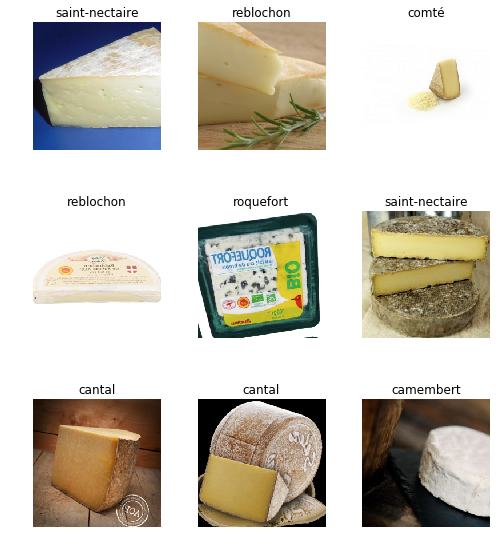

In [7]:
data.show_batch(rows=3, figsize=(7,8))

A model is trained on this set: its top losses are used to detect the most unrelated images.

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(2)

Unrelated images are removed with the ImageCleaner widget:

In [9]:
ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path);

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

The same widget is used to remove duplicate images.

In [10]:
ds, idxs = DatasetFormatter().from_similars(learn)
ImageCleaner(ds, idxs, path, duplicates=True);

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

The cleaned dataset is saved by the widget in a CSV file.

## 3. Training the Model

The newly created `cleaned.csv` is loaded. To track the progress of the new model, 20% of the images are separated into a validation set.

In [11]:
data = ImageDataBunch.from_csv(
    path,
    valid_pct=0.2,
    csv_labels="cleaned.csv",
    ds_tfms=get_transforms(),
    size=224,
    num_workers=4,
).normalize(imagenet_stats)

In [12]:
data.classes

['camembert', 'cantal', 'comté', 'reblochon', 'roquefort', 'saint-nectaire']

A new resnet34 model is trained against this data.

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.929697,1.057323,0.371287,00:06
1,1.352917,0.691667,0.222772,00:06
2,1.062714,0.642205,0.198020,00:06
3,0.879886,0.648005,0.207921,00:06


After a few epochs, the error rate stops improving. To further improve it, the deeper layers of the NN are unfreezed.

In [14]:
learn.unfreeze()

The learning-rate finder is used to compute the loss resluting from different error rates:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


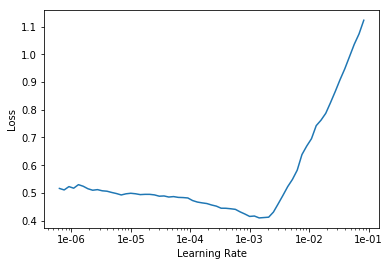

In [15]:
learn.lr_find()
learn.recorder.plot()

The longest downwards slope will be used as the learning rates for deeper layers. It is located roughly between $10^{-5}$ and $10^{-3}$.

In [16]:
learn.fit_one_cycle(8, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.511700,0.608825,0.188119,00:07
1,0.450808,0.547865,0.188119,00:07
2,0.374529,0.537478,0.193069,00:07
3,0.305830,0.495213,0.163366,00:07
4,0.255293,0.494978,0.198020,00:07
5,0.213392,0.486911,0.193069,00:07
6,0.177095,0.476001,0.183168,00:07
7,0.150011,0.473115,0.188119,00:07


The model is ready to be exported.

In [17]:
learn.export()

## 4. Interpretating the Results

Results can be interpreted using the ClassificationInterpretation class.

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

Top losses are shown, i.e. wrong guesses where the model was the most confident.

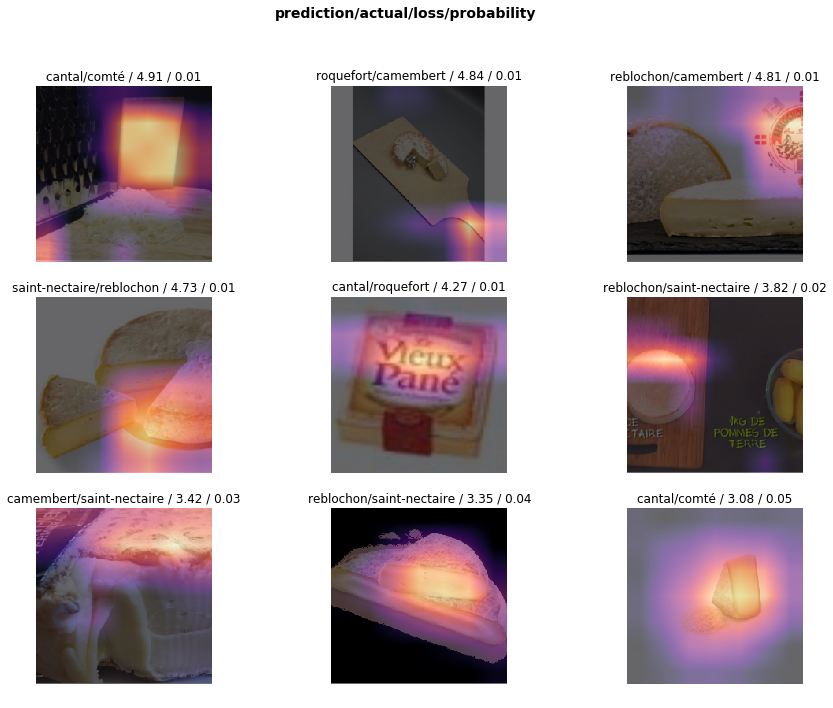

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

The confusion matrix sums up the results.

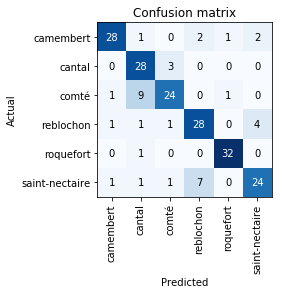

In [20]:
interp.plot_confusion_matrix()

Finally, the most confused function shows classes that were most guessed opposite.

In [21]:
interp.most_confused(min_val=2)

[('comté', 'cantal', 9),
 ('saint-nectaire', 'reblochon', 7),
 ('reblochon', 'saint-nectaire', 4),
 ('cantal', 'comté', 3),
 ('camembert', 'reblochon', 2),
 ('camembert', 'saint-nectaire', 2)]